<a href="https://colab.research.google.com/github/aiguozhe01/DIC_Assignment/blob/master/Sprint_18_copied.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint データセット作成


## 【問題1】自作データセットでの分類の学習

### 画像ファイルを読み込む

In [40]:
import numpy  as np
import os
import glob 
import re
import PIL
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

In [4]:
os.chdir('/content/drive/My Drive/DIC/dataset/training')
print(os.getcwd())

/content/drive/My Drive/DIC/dataset/training


In [2]:
path = '/content/drive/My Drive/DIC/dataset/training' 
flist = os.listdir(path)

In [6]:
!ls -a ./

bcat_01.png  bcat_04.jpg  kcat_01.jpg	   wolfdog_03.jpg
bcat_02.jpg  bcat_05.jpg  wolfdog_01.jpeg  wolfdog_04.jpg
bcat_03.jpg  innu_01.jpg  wolfdog_02.jpg   wolfdog_05.jpg


In [7]:
flist

['wolfdog_01.jpeg',
 'wolfdog_02.jpg',
 'wolfdog_03.jpg',
 'wolfdog_04.jpg',
 'bcat_01.png',
 'bcat_02.jpg',
 'bcat_03.jpg',
 'bcat_04.jpg',
 'kcat_01.jpg',
 'bcat_05.jpg',
 'innu_01.jpg',
 'wolfdog_05.jpg']

In [8]:
img_list = glob.glob(path + '/*' + ".jpg")

In [9]:
img_list 

['/content/drive/My Drive/DIC/dataset/training/wolfdog_02.jpg',
 '/content/drive/My Drive/DIC/dataset/training/wolfdog_03.jpg',
 '/content/drive/My Drive/DIC/dataset/training/wolfdog_04.jpg',
 '/content/drive/My Drive/DIC/dataset/training/bcat_02.jpg',
 '/content/drive/My Drive/DIC/dataset/training/bcat_03.jpg',
 '/content/drive/My Drive/DIC/dataset/training/bcat_04.jpg',
 '/content/drive/My Drive/DIC/dataset/training/kcat_01.jpg',
 '/content/drive/My Drive/DIC/dataset/training/bcat_05.jpg',
 '/content/drive/My Drive/DIC/dataset/training/innu_01.jpg',
 '/content/drive/My Drive/DIC/dataset/training/wolfdog_05.jpg']

In [ ]:
pwd

'/content/drive/My Drive'

In [ ]:
cd /content/drive/My Drive/training

/content/drive/My Drive/training


### 画像ファイルのロード、配列化、リサイズ、データセット作成

In [12]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in flist:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img_ = Image.open(img)
        
        # サイズを揃える
        dog_img_ = dog_img_.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img_)
        
        # 正規化
        dog_img = dog_img / 255.
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
        
        dog_img_.close()
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img_ = Image.open(img)
        
        cat_img_ = cat_img_.resize((224, 224))
        
        cat_img = np.array(cat_img_)
        
        cat_img = cat_img / 255.
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)
        
        cat_img_.close()

In [13]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(6, 224, 224, 3)


### イメージの出力

In [14]:
# 配列のまま出力

print('データ型:', cat_img_array[3].dtype)

cat_img_array[3]

データ型: float64


array([[[0.16862745, 0.29411765, 0.14901961],
        [0.16078431, 0.28627451, 0.14117647],
        [0.18039216, 0.29803922, 0.1372549 ],
        ...,
        [0.56862745, 0.66666667, 0.25882353],
        [0.56862745, 0.69019608, 0.27058824],
        [0.55294118, 0.70196078, 0.2745098 ]],

       [[0.16078431, 0.28627451, 0.14117647],
        [0.15294118, 0.27843137, 0.13333333],
        [0.17254902, 0.28627451, 0.12941176],
        ...,
        [0.57647059, 0.67843137, 0.25882353],
        [0.56862745, 0.69411765, 0.2627451 ],
        [0.55294118, 0.70196078, 0.2627451 ]],

       [[0.14509804, 0.27058824, 0.12941176],
        [0.1372549 , 0.2627451 , 0.11764706],
        [0.15686275, 0.27058824, 0.11372549],
        ...,
        [0.58823529, 0.69019608, 0.25098039],
        [0.57254902, 0.70196078, 0.25098039],
        [0.55686275, 0.70980392, 0.25098039]],

       ...,

       [[0.76470588, 0.76078431, 0.78039216],
        [0.77647059, 0.77254902, 0.79215686],
        [0.80784314, 0

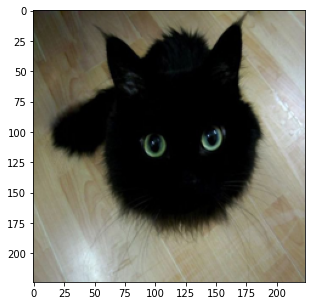

In [15]:
# 配列を画像として出力

plt.rcParams['figure.figsize'] = (5.0, 5.0)

plt.imshow(cat_img_array[2])

plt.show()

In [ ]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


<class 'PIL.Image.Image'>


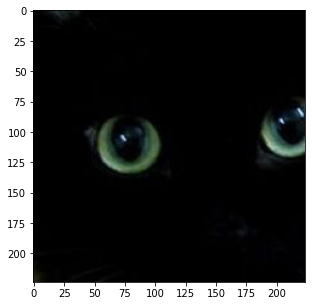

In [ ]:
img = Image.open(img_list[4])

img_new = crop_center(img, 224, 224)

print(type(img_new))

plt.imshow(img_new)

plt.show()

img.close()

## Kerasでも読み込んでみよう

In [ ]:
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
img_keras = load_img(img_list[4], grayscale=False, color_mode='rgb', target_size=(224,224))

img_keras_array = img_to_array(img_keras) / 255.

print('データ型:', img_keras_array.dtype)

img_keras_array

データ型: float32


array([[[0.20784314, 0.18431373, 0.12941177],
        [0.20784314, 0.18431373, 0.13725491],
        [0.20392157, 0.1764706 , 0.13725491],
        ...,
        [0.627451  , 0.62352943, 0.5411765 ],
        [0.6       , 0.59607846, 0.5137255 ],
        [0.6       , 0.59607846, 0.5137255 ]],

       [[0.22745098, 0.20392157, 0.14117648],
        [0.21176471, 0.1882353 , 0.13333334],
        [0.18431373, 0.15686275, 0.11764706],
        ...,
        [0.627451  , 0.62352943, 0.5411765 ],
        [0.61960787, 0.6156863 , 0.53333336],
        [0.6039216 , 0.6       , 0.5176471 ]],

       [[0.19607843, 0.1764706 , 0.10196079],
        [0.2       , 0.1764706 , 0.11372549],
        [0.20392157, 0.18039216, 0.1254902 ],
        ...,
        [0.62352943, 0.6117647 , 0.5372549 ],
        [0.627451  , 0.6156863 , 0.5411765 ],
        [0.61960787, 0.60784316, 0.53333336]],

       ...,

       [[0.52156866, 0.49803922, 0.43529412],
        [0.53333336, 0.50980395, 0.44705883],
        [0.54901963, 0

<class 'PIL.Image.Image'>


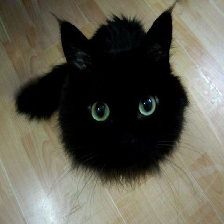

In [ ]:
print(type(img_keras))

img_keras

### Resizeについて

In [ ]:
import cv2

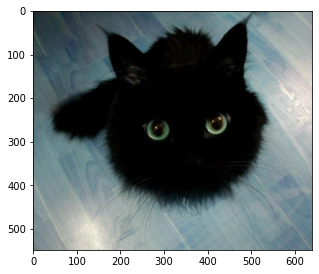

In [ ]:
# 元のサイズの画像

img = cv2.imread(img_list[4])

plt.imshow(img)

plt.show()

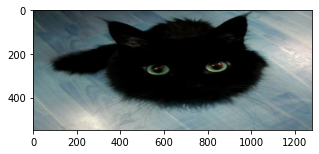

In [ ]:
#plt.rcParams['figure.figsize'] = (10.0, 10.0)

img = cv2.imread(img_list[4])

# 横幅2倍にしてみる
img = cv2.resize(img, None, fx = 2, fy = 1)

plt.imshow(img)

plt.show()

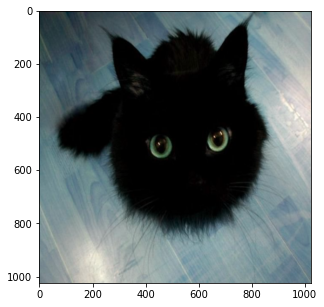

In [ ]:
img = cv2.imread(img_list[4])

img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

### openCVの色形式

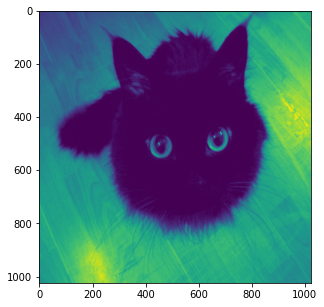

In [ ]:
# 第二引数を0にするとグレースケールで読み込める
plt.rcParams['figure.figsize'] = (5.0, 5.0)

img = cv2.imread(img_list[4], 0)

# cv2でリサイズ
img = cv2.resize(img, (1024, 1024), cv2.INTER_NEAREST)

plt.imshow(img)

plt.show()

In [ ]:
img_array_1 = img_to_array(img) / 255.
img_array_1.shape

(1024, 1024, 1)

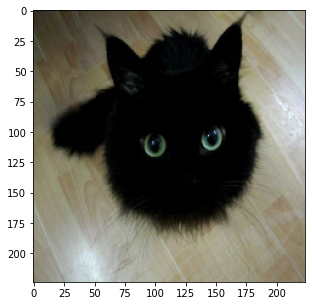

In [ ]:
img = cv2.imread(img_list[4])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGBチャネル

plt.imshow(img_rgb)

plt.show()

## 【問題2】分類データセットに対するデータ拡張

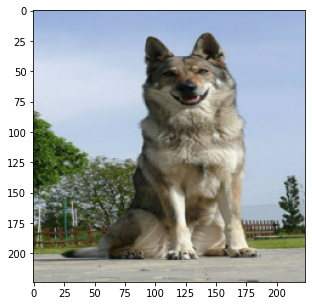

In [18]:
# 元の画像を描画
import cv2
from torch.utils.data import Dataset
import albumentations as albu

img = dog_img_array[1]
plt.imshow(img)

In [19]:
# 拡張用関数を定義
def augment(aug, image):
    return aug(image=image)['image']

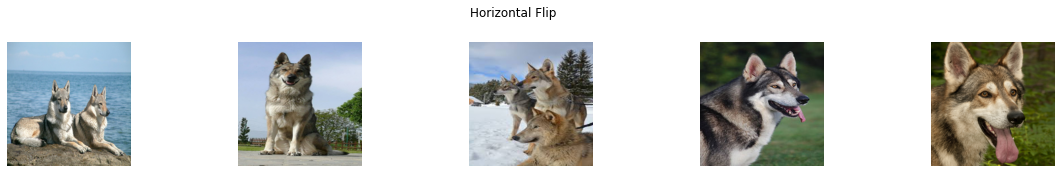

In [21]:
aug = albu.HorizontalFlip(p=1)

fig = plt.figure(figsize=(20,5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(augment(aug, np.array(dog_img_array[i])))
    plt.axis('off')
    fig.suptitle('Horizontal Flip')

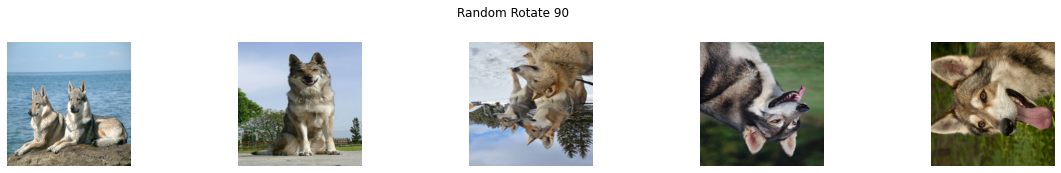

In [22]:
aug = albu.RandomRotate90(p=1)

fig = plt.figure(figsize=(20,5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(augment(aug, np.array(dog_img_array[i])))
    plt.axis('off')
    fig.suptitle('Random Rotate 90')

In [36]:
from albumentations import (
    Resize, HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)

def strong_aug(p=0.5):
    return Compose([
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=0.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=0.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomBrightnessContrast(),
        ], p=0.3),
        HueSaturationValue(p=0.3),
    ], p=p)

## 【問題3】物体検出データセットの用意

In [34]:
# アノテーションファイルのパスを指定
ANOT_PATH = '/content/drive/My Drive/DIC/dataset/training/annotations/'
CLASS_PATH = '/content/drive/My Drive/DIC/dataset/training/'

# labellmgの出力フォーマットを確認
print(np.loadtxt(ANOT_PATH+'bcat_01.txt', dtype=str)) # [class, bounding box coord]
        
# ClassesはYOLO標準ファイルに犬猫があったため、流用（dog=0, cat=2）
classes = np.loadtxt(CLASS_PATH+'classes.txt', dtype=str, delimiter='/n')
print(classes)

['2' '0.472057' '0.499780' '0.664352' '0.941358']
['dog' 'person' 'cat' 'tv' 'car' 'meatballs' 'marinara sauce'
 'tomato soup' 'chicken noodle soup' 'french onion soup' 'chicken breast'
 'ribs' 'pulled pork' 'hamburger' 'cavity']


In [46]:
# yolo用アノテーションファイルを準備
# 各text fileをyolo形式で一つのファイルに保存 → [file name, bounding box coord, class]

annotations = []
for file in os.listdir(ANOT_PATH):
    if '.txt' in file:
        txt = np.loadtxt(ANOT_PATH+file, dtype=str)
        txt[0:-1], txt[-1] = txt[1:], txt[0] # 要素の位置を入れ替え、classを末尾へ
        annotations.append([file.rstrip('.txt')+'.jpg', ','.join((txt))])

annotations = np.array(annotations)
np.savetxt(CLASS_PATH+'train.txt', annotations, fmt='%s %s')

## 【問題4】物体検出データセットに対するデータ拡張

In [37]:
# BBoxをターゲットできない拡張手法を除外

def strong_aug_bbcompat(p=0.5):
    return Compose([
        Resize(256, 256),
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=0.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        OneOf([
#             OpticalDistortion(p=0.3),
#             GridDistortion(p=0.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomBrightnessContrast(),
        ], p=0.3),
        HueSaturationValue(p=0.3),
    ], bbox_params=albu.BboxParams(format='pascal_voc', label_fields=['category_id']))

In [38]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
#     plt.figure(figsize=(12, 12))
    plt.imshow(img)
    
    
def yolo_to_xywh(image, bbox):
    yolo_x, yolo_y, yolo_width, yolo_height = bbox
    image_height, image_width = image
    
    x_center = yolo_x * image_width
    y_center = yolo_y * image_height
    width = yolo_width * image_width
    height = yolo_height * image_height

    x_left = (yolo_x - yolo_width/2) * image_width
    y_top = (yolo_y - yolo_height/2) * image_height
    
    return x_left, y_top, width, height

ValueError: ignored

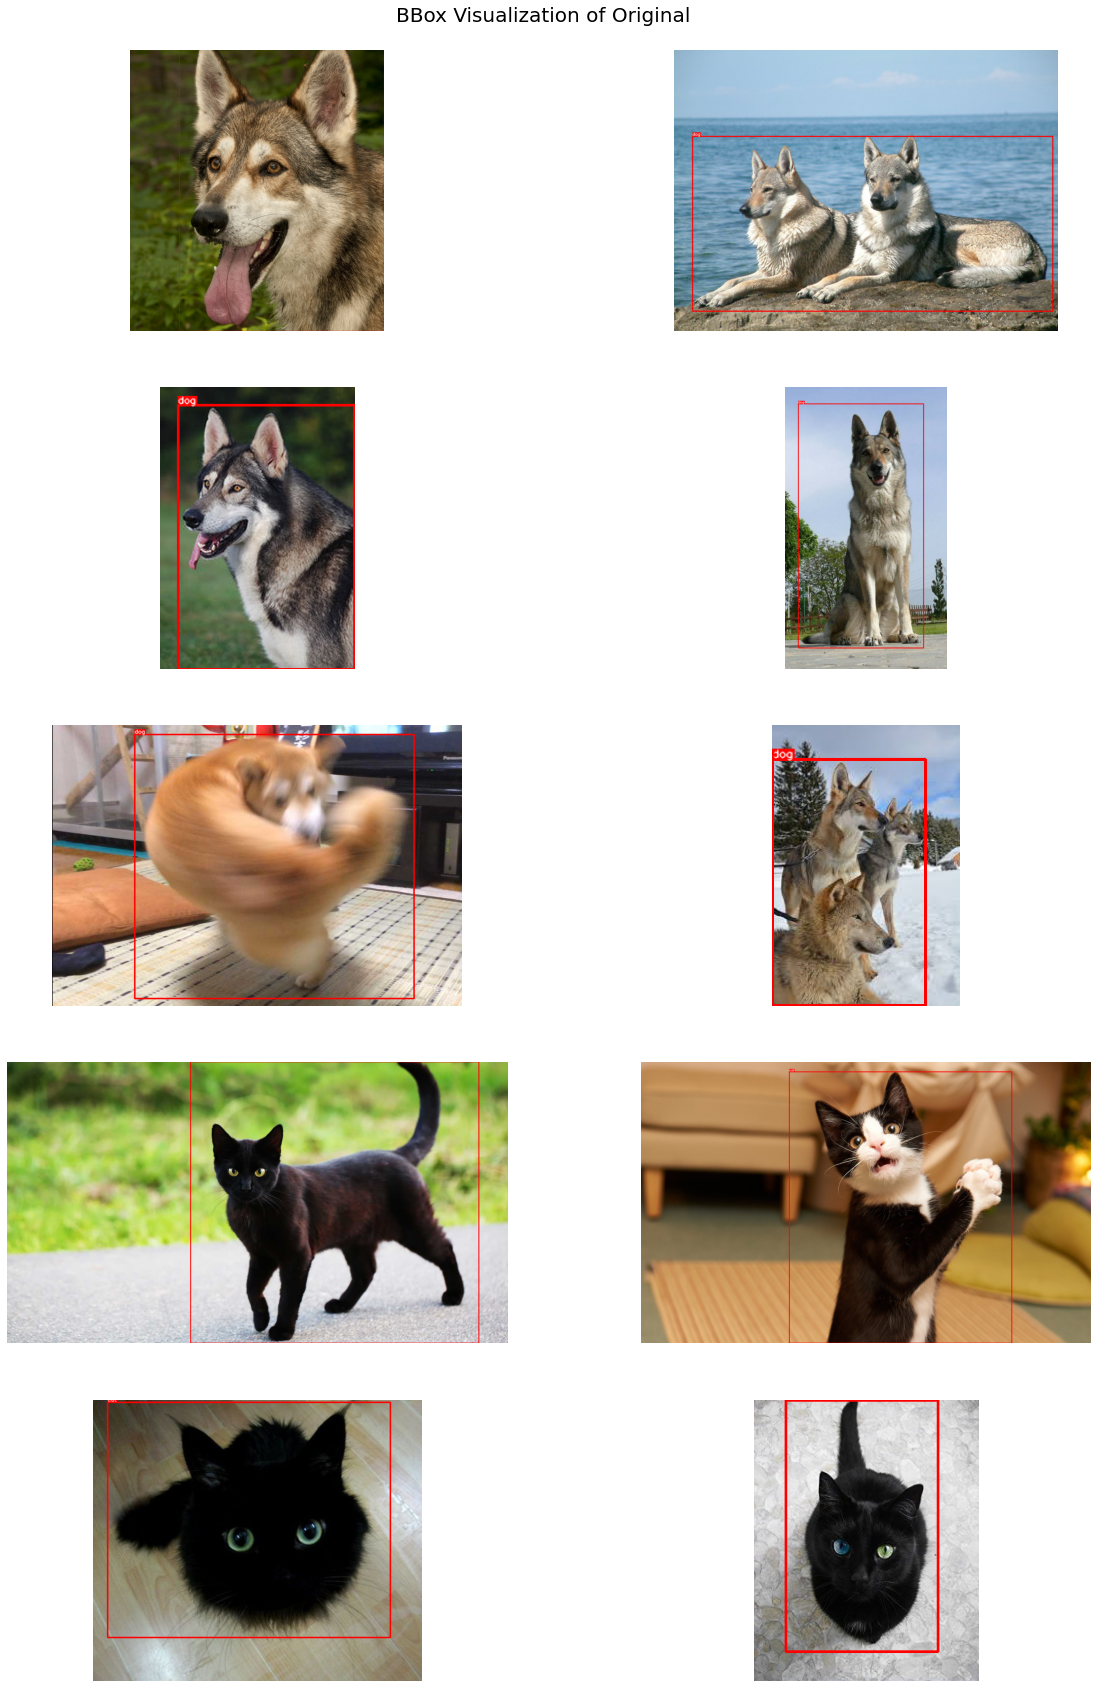

In [50]:
fig = plt.figure(figsize=(20,30))
for i, line in enumerate(annotations):
    image = PIL.Image.open(CLASS_PATH+line[0]).convert('RGB')
    image = np.array(image)
    bbox_yolo = list(map(float, line[1].split(',')))[:-1]
    bbox = np.array(yolo_to_xywh(image.shape[:2], bbox_yolo))[None,:]
    category_id = [int(list(line[1].split(','))[-1])]
    
    anot_dic = {'image': image, 'bboxes': bbox, 'category_id': category_id}
    category_id_to_name={0: 'dog', 2: 'cat'}

    plt.subplot(5, 2, i+1)
    visualize(anot_dic, category_id_to_name)
    plt.axis('off')
    fig.suptitle('BBox Visualization of Original', fontsize=20, y=0.9)